# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [122]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

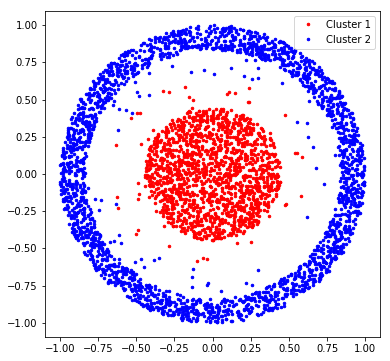

In [124]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 100
threshold = 10000
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

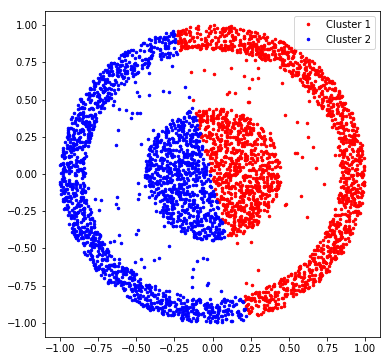

In [22]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [3]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [12]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans


# YOUR CODE HERE
mean_idx_kmeans = 0
mean_idx_spectral = 0
# begin answer
dic = {}
tot = 0
for j in range(len(gnd)):
    if(gnd[j] in dic):
        continue
    else:
        dic[gnd[j]] = tot
        tot = tot + 1
for j in range(len(gnd)):
    gnd[j] = dic[gnd[j]]
w = constructW(fea, NeighborMode='KNN', WeightMode='HeatKernel', k = 5)
W = w.toarray()

runtimes = 10
for i in range(runtimes):
#     print(i)
    idx_spectral = spectral(w.toarray(), 5)
    idx_kmeans = kmeans(w.toarray(), 5)
    new_idx_kmeans = bestMap(gnd, idx_kmeans)
    new_idx_spectral = bestMap(gnd, idx_spectral)
    mean_idx_kmeans = mean_idx_kmeans + MutualInfo(new_idx_kmeans, gnd)
    mean_idx_spectral = mean_idx_spectral + MutualInfo(new_idx_spectral, gnd)
print(mean_idx_kmeans / runtimes, mean_idx_spectral / runtimes)
# end answer

0
1
2
3
4
5
6
7
8
9
1.0160989712925423 0.6350511308095197
